In [1]:
import pandas as pd
from scipy import stats
import os
import glob
import numpy as np

In [2]:
path = r'G:\My Drive\Mahad\Light Level Experiments\Data Output from Analysis\MainVideoProcessingCodes_v4\Step6_v4\\'
outpath = r'./dataFolders/Output/Step6_v4/'

In [3]:
def in_ranges(x,bins):
    return [((x>=y[0])&(x<=y[1])) for y in bins]

In [4]:
notoutliers = pd.read_csv(path + 'AllLight_EveryMoth_notOutliers.csv')
notoutliers['DiscoveryTime'] = notoutliers.DiscoveryTime.div(100,axis = 'index')
notoutliers = notoutliers.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])
notoutliers.head()

,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,zscore,outlier_ID,condition
0,45940,53025,46222.0,2.82,0,L0.1_c-3_m20,0.251222,False,Low
1,55058,60805,55341.0,2.83,1,L0.1_c-3_m20,0.249691,False,Low
2,67612,69165,67744.0,1.32,2,L0.1_c-3_m20,0.480929,False,Low
3,72461,74177,72606.0,1.45,3,L0.1_c-3_m20,0.461021,False,Low
4,77368,79850,77499.0,1.31,4,L0.1_c-3_m20,0.482460,False,Low


In [5]:
test = notoutliers.name.str.split('_', expand = True)
notoutliers['lightLevel'] = test[0]

In [6]:
# find the visit number that have high exploratoin times
notoutliers.loc[(notoutliers['lightLevel']=='L50') & (notoutliers['DiscoveryTime']>15), 'trialNum']

299     4
313     9
323     8
326     2
335     2
341     8
342     9
350     2
357    10
362    16
371     4
385     1
399    14
411     0
427     4
Name: trialNum, dtype: int64

In [7]:
Bins = [(0,4), (10,20), (12,22), (14,24), (17,24), (10, 15), (15,20), (20,25)]
label = ['(0,4)' ,'(10,20)', '(12,22)', '(14,24)', '(17,24)', '(10, 15)', '(15,20)', '(20,25)']

In [8]:
binned = notoutliers['trialNum'].apply(lambda x: pd.Series(in_ranges(x,Bins), label))

In [9]:
notoutliers = notoutliers.join(binned)

In [10]:
for l, sub_df in notoutliers.groupby('lightLevel'):
    for bin_label in label:
        sub_sub_df = sub_df[sub_df[bin_label] == True]
        n = len(sub_sub_df)
        print('%s and %s bin has %i visits' %(l, bin_label, n))     

L0.1 and (0,4) bin has 75 visits
L0.1 and (10,20) bin has 74 visits
L0.1 and (12,22) bin has 64 visits
L0.1 and (14,24) bin has 57 visits
L0.1 and (17,24) bin has 37 visits
L0.1 and (10, 15) bin has 50 visits
L0.1 and (15,20) bin has 31 visits
L0.1 and (20,25) bin has 26 visits
L50 and (0,4) bin has 47 visits
L50 and (10,20) bin has 37 visits
L50 and (12,22) bin has 28 visits
L50 and (14,24) bin has 22 visits
L50 and (17,24) bin has 14 visits
L50 and (10, 15) bin has 27 visits
L50 and (15,20) bin has 12 visits
L50 and (20,25) bin has 8 visits


In [11]:
notoutliers = notoutliers.to_csv(outpath + 'AllLight_EveryMoth_notOutliers_withDifferentBins.csv')

## generate and store the pde and data for plotting later

In [12]:
from scipy.stats import gaussian_kde

In [13]:
bin_center = np.linspace(0,40,100)
delta = np.diff(bin_center)[0]

In [14]:
notoutliers = pd.read_csv(outpath + 'AllLight_EveryMoth_notOutliers_withDifferentBins.csv')

### store pde

In [15]:
SampleSize = pd.DataFrame(columns = ['L0.1', 'L50'], index = label)
pde_df = pd.DataFrame(columns = label, index = bin_center)

for l, subdf in notoutliers.groupby('lightLevel'):
    for bin_label in label:
        df = subdf[subdf[bin_label] == True]
        data = df.DiscoveryTime  
        SampleSize.loc[bin_label,l] = len(data)
        
        kde = gaussian_kde(data)
        temp = kde.pdf(bin_center)
        temp /= delta * np.sum(temp)
        pde_df.loc[:,bin_label]=temp
    pde_df.to_csv(outpath+ l + '_DifferentBins_pde.csv')
SampleSize.to_csv(outpath+ '_DifferentBins_samplesize.csv')

## plot the different bins

In [16]:
low_pde = pd.read_csv(outpath + 'L0.1' + '_DifferentBins_pde.csv')
high_pde = pd.read_csv(outpath + 'L50' + '_DifferentBins_pde.csv')

In [17]:
low_pde.head()

,Unnamed: 0,"(0,4)","(10,20)","(12,22)","(14,24)","(17,24)","(10, 15)","(15,20)","(20,25)"
0,0.000000,0.078596,0.105262,0.098388,0.113332,0.124897,0.102269,0.094643,0.124726
1,0.404040,0.097535,0.122409,0.114451,0.141531,0.157246,0.114098,0.116537,0.152732
2,0.808081,0.115776,0.137082,0.128575,0.164988,0.183555,0.124129,0.136552,0.174123
3,1.212121,0.131654,0.148058,0.139691,0.180565,0.199701,0.131777,0.152740,0.186418
4,1.616162,0.143663,0.154507,0.147011,0.186868,0.203930,0.136620,0.163698,0.189516


In [18]:
SampleSize

,L0.1,L50
"(0,4)",75,47
"(10,20)",74,37
"(12,22)",64,28
"(14,24)",57,22
"(17,24)",37,14
"(10, 15)",50,27
"(15,20)",31,12
"(20,25)",26,8


In [32]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '8'

In [45]:
def plotPDE(ax, labels, early, late, color_early, color_late, early_data, late_data, p_value, early_N, late_N):
    ax.plot(early, labels, color = color_early)
    ax.plot([-0.015]*len(early_data), early_data,
               '_',
               ms = 5,
    #                color = color[0], 
               mec = color_early,
               mew = 0.3
              )

    ax.plot(late, labels, color = color_late)
    ax.plot([-0.025]*len(late_data), late_data,
               '_',
               ms = 5,
    #                color = color[0], 
               mec = color_late,
               mew = 0.3
              )
    
    ax.text(0.5, 0.5, 'p = '+'%0.3f' %p_value, transform=ax.transAxes)
    ax.text(0.5, 0.7, 'n = ' + str(early_N), transform=ax.transAxes, color = color_early)
    ax.text(0.5, 0.6, 'n = ' + str(late_N), transform=ax.transAxes, color = color_late)

In [63]:
def selectlist(lst, *indices):
    return (lst[i] for i in indices)

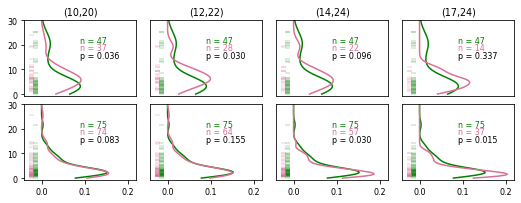

In [69]:
w = 7
h = 7/3
f1 = plt.figure(figsize = (w,h))

bins_set = ['(10,20)', '(12,22)', '(14,24)', '(17,24)']
low_early_data=notoutliers.loc[(notoutliers['(0,4)'] == True) & (notoutliers['lightLevel'] == 'L0.1'),
                             'DiscoveryTime'].values

high_early_data=notoutliers.loc[(notoutliers['(0,4)'] == True) & (notoutliers['lightLevel'] == 'L50'),
                             'DiscoveryTime'].values
low_early_N = len(low_early_data)
high_early_N = len(high_early_data)

x_shift = 0
for binlabel in bins_set:
    high_late_data = notoutliers.loc[(notoutliers[binlabel] == True) & (notoutliers['lightLevel'] == 'L50'),
                             'DiscoveryTime'].values
    low_late_data = notoutliers.loc[(notoutliers[binlabel] == True) & (notoutliers['lightLevel'] == 'L0.1'),
                             'DiscoveryTime'].values
    high_late_N = len(high_late_data)
    low_late_N = len(low_late_data)
    
    _,p_high = stats.mannwhitneyu(high_early_data, high_late_data)
    _,p_low = stats.mannwhitneyu(low_early_data, low_late_data)
    
    # plot high light level
    ax_high = f1.add_axes((0 + x_shift, 0.5 , 1/4.5, 0.45))
    plotPDE(ax_high, high_pde['Unnamed: 0'], high_pde['(0,4)'], high_pde[binlabel], 
            'green', 'palevioletred',
           high_early_data, high_late_data,
           p_high, high_early_N, high_late_N)
    
    ax_high.set_title(binlabel)
    
    # plot low light level
    ax_low = f1.add_axes((0 + x_shift, 0 , 1/4.5, 0.45))
    plotPDE(ax_low, low_pde['Unnamed: 0'], low_pde['(0,4)'], low_pde[binlabel], 
            'green', 'palevioletred',
           low_early_data, low_late_data,
           p_low, low_early_N, low_late_N)
    
    
    x_shift+=1/4

for axes in f1.axes:
    axes.set_xlim([-0.04, 0.22])
    axes.set_ylim([-0.7, 30])
    
for axes in list(selectlist(f1.axes, 0,2,4,6)):
    axes.set_xticks([])
for axes in list(selectlist(f1.axes, 2, 3, 4, 5, 6, 7)):
    axes.set_yticks([])
f1.savefig('./dataFolders/Output/Step6_v4/Figure/Learning_differentBins.pdf',
          bbox_inches = 'tight')

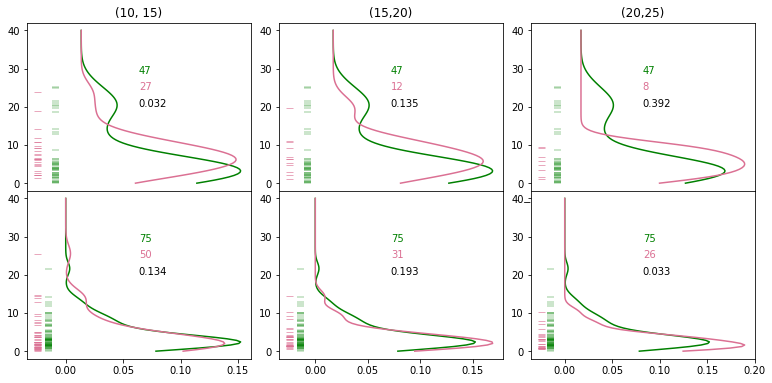

In [24]:
w = 7*2
h = 7/3*2
f2 = plt.figure(figsize = (w,h))

bins_set = ['(10, 15)', '(15,20)', '(20,25)']
low_early_data=notoutliers.loc[(notoutliers['(0,4)'] == True) & (notoutliers['lightLevel'] == 'L0.1'),
                             'DiscoveryTime'].values

high_early_data=notoutliers.loc[(notoutliers['(0,4)'] == True) & (notoutliers['lightLevel'] == 'L50'),
                             'DiscoveryTime'].values
low_early_N = len(low_early_data)
high_early_N = len(high_early_data)

x_shift = 0
for binlabel in bins_set:
    high_late_data = notoutliers.loc[(notoutliers[binlabel] == True) & (notoutliers['lightLevel'] == 'L50'),
                             'DiscoveryTime'].values
    low_late_data = notoutliers.loc[(notoutliers[binlabel] == True) & (notoutliers['lightLevel'] == 'L0.1'),
                             'DiscoveryTime'].values
    high_late_N = len(high_late_data)
    low_late_N = len(low_late_data)
    
    _,p_high = stats.mannwhitneyu(high_early_data, high_late_data)
    _,p_low = stats.mannwhitneyu(low_early_data, low_late_data)
    
    # plot high light level
    ax_high = f2.add_axes((0 + x_shift, 0.5 , 1/4.5, 0.5))
    plotPDE(ax_high, high_pde['Unnamed: 0'], high_pde['(0,4)'], high_pde[binlabel], 
            'green', 'palevioletred',
           high_early_data, high_late_data,
           p_high, high_early_N, high_late_N)
    
    ax_high.set_title(binlabel)
    
    # plot low light level
    ax_low = f2.add_axes((0 + x_shift, 0 , 1/4.5, 0.5))
    plotPDE(ax_low, low_pde['Unnamed: 0'], low_pde['(0,4)'], low_pde[binlabel], 
            'green', 'palevioletred',
           low_early_data, low_late_data,
           p_low, low_early_N, low_late_N)
    
    
    x_shift+=1/4

for axes in f1.axes:
    axes.set_xlim([-0.04, 0.22])
#     ax.set_ylim([y0,y1])
#     x0,x1 = ax.get_xlim()
    
    # print(ax.get_xlim())

#     f1.savefig('./dataFolders/Output/Step6_v4/Figure/L0.1_firstLastPDE.pdf')
#     f1.clf()